<a href="https://colab.research.google.com/github/DineshSiddhartha/DataScience-Project/blob/main/Jupyter_Notebooks/netflix_recommendation_system.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [ ]:
netflix_dataset=pd.read_csv("/content/netflix_dataset.csv")
netflix_dataset.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,07:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [ ]:
dict = {}
for i in list(netflix_dataset.columns):
    dict[i] = netflix_dataset[i].value_counts().shape[0]

print(pd.DataFrame(dict,index = ["unique count"]).transpose())

              unique count
show_id               7787
type                     2
title                 7787
director              4049
cast                  6831
country                681
date_added            1565
release_year            73
rating                  14
duration               216
listed_in              492
description           7769


In [ ]:
imdb_ratings=pd.read_csv( '/content/IMDb ratings.csv', usecols=['weighted_average_vote'])
imdb_titles=pd.read_csv('/content/IMDb movies.csv', usecols=['title','year','genre'])
ratings = pd.DataFrame({'Title':imdb_titles.title,
                    'Release Year':imdb_titles.year,
                    'Rating': imdb_ratings.weighted_average_vote,
                    'Genre':imdb_titles.genre})
ratings.drop_duplicates(subset=['Title','Release Year','Rating'], inplace=True)
ratings.shape

(85852, 4)

In [ ]:
ratings.dropna()
joint_data=ratings.merge(netflix_dataset,left_on='Title',right_on='title',how='inner')
joint_data=joint_data.sort_values(by='Rating', ascending=False)

In [ ]:
netflix_dataset['description'].head()

,description
0,In a future where the elite inhabit an island ...
1,After a devastating earthquake hits Mexico Cit...
2,"When an army recruit is found dead, his fellow..."
3,"In a postapocalyptic world, rag-doll robots hi..."
4,A brilliant group of students become card-coun...


In [ ]:
random_indices = np.random.randint(0, 7787, 400)
netflix_dataset = netflix_dataset.iloc[random_indices]


In [ ]:
netflix_dataset

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
3658,s3659,Movie,Little Dragon Maiden,Hua Shan,"Leslie Cheung, Jing-Jing Yung, Chen Kuan-tai, ...",Hong Kong,"August 1, 2018",1983,TV-14,92 min,"Action & Adventure, International Movies, Roma...","Seeking to improve his combat skills, a young ..."
885,s886,Movie,Bhaji In Problem,Smeep Kang,"Gippy Grewal, Gurpreet Guggi, Ragini Khanna, O...",India,"September 19, 2020",2013,TV-14,117 min,"Comedies, International Movies",Married to two women – each unaware of the oth...
984,s985,TV Show,Blood & Treasures,NaN,"Nawat Kulrattanarak, Woranuch Wongsawan, Jespi...",Thailand,"July 14, 2018",2016,TV-14,1 Season,"International TV Shows, TV Dramas, TV Sci-Fi &...",Condemned by a centuries-old vow to protect he...
2027,s2028,TV Show,Especial 20 años Fútbol de Primera,NaN,NaN,NaN,"May 20, 2020",2020,TV-14,1 Season,"Docuseries, International TV Shows, Spanish-La...",Revisit the emotional bouts and memorable high...
7068,s7069,Movie,Thriller,Dallas Jackson,"Jessica Allain, Luke Tennie, Tequan Richmond, ...",United States,"April 14, 2019",2018,TV-MA,87 min,Horror Movies,"When a prank goes wrong, a shy kid from Compto..."
...,...,...,...,...,...,...,...,...,...,...,...,...
2167,s2168,Movie,Finally Found Someone,Theodore Boborol,"John Lloyd Cruz, Sarah Geronimo, Enchong Dee, ...",Philippines,"March 14, 2019",2017,TV-14,125 min,"International Movies, Romantic Movies",After a woman is very publicly left at the alt...
6900,s6901,TV Show,The Staircase,NaN,NaN,France,"June 8, 2018",2018,TV-MA,1 Season,"Crime TV Shows, Docuseries, TV Mysteries",Accident or murder? After the mysterious death...
2964,s2965,TV Show,In Family We Trust,NaN,"Songsit Roongnophakunsri, Saksit Tangtong, Kat...",Thailand,"December 29, 2018",2018,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Dramas",When the head of the lucrative family business...
5556,s5557,TV Show,She's Gotta Have It,NaN,"DeWanda Wise, Cleo Anthony, Lyriq Bent, Anthon...",United States,"May 24, 2019",2018,TV-MA,2 Seasons,"Romantic TV Shows, TV Comedies, TV Dramas",Nola Darling struggles to stay true to herself...


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(stop_words='english')
netflix_dataset['description'] = netflix_dataset['description'].fillna('')
tfidf_matrix = tfidf.fit_transform(netflix_dataset['description'])
tfidf_matrix.shape

(400, 3076)

In [ ]:
from sklearn.metrics.pairwise import linear_kernel
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

In [ ]:
random_indices = np.random.choice(len(netflix_dataset), size=200, replace=False)
netflix_dataset = netflix_dataset.iloc[random_indices].reset_index(drop=True)
netflix_dataset

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s6815,Movie,The Republic of Imbaba,Ahmed Al-Badry,"Bassem Samra, Ola Ghanem, Ahmad Wafiq, Feryal ...",NaN,"June 6, 2019",2015,TV-14,90 min,"Dramas, International Movies",Living on the edges of Cairo’s Embabah neighbo...
1,s7277,TV Show,Twelve Forever,NaN,"Kelsy Abbott, Antony Del Rio, Jaylen Barron, M...",United States,"July 29, 2019",2019,TV-PG,1 Season,Kids' TV,Reggie's wild imagination unlocks a weird and ...
2,s488,Movie,An American Tail: The Mystery of the Night Mon...,Larry Latham,"Thomas Dekker, Lacey Chabert, Jane Singer, Neh...",United States,"April 1, 2018",1999,G,75 min,Children & Family Movies,When a monster goes on a mouse-napping spree i...
3,s1712,TV Show,Designated Survivor,NaN,"Kiefer Sutherland, Natascha McElhone, Maggie Q...",United States,"June 7, 2019",2019,TV-MA,3 Seasons,"Crime TV Shows, TV Dramas, TV Thrillers",America's fate rests in the hands of a low-lev...
4,s5642,Movie,Sisterakas,Wenn V. Deramas,"Ai-Ai de las Alas, Vice Ganda, Kris Aquino, Xy...",Philippines,"March 7, 2019",2012,TV-14,105 min,"Comedies, International Movies",Two half siblings separated by family conflict...
...,...,...,...,...,...,...,...,...,...,...,...,...
195,s1845,TV Show,Dracula,NaN,"Claes Bang, Dolly Wells, John Heffernan",United Kingdom,"January 4, 2020",2020,TV-14,1 Season,"British TV Shows, International TV Shows, TV D...",The Count Dracula legend transforms with new t...
196,s2488,Movie,"Good Night, and Good Luck",George Clooney,"David Strathairn, Patricia Clarkson, George Cl...","United States, France, United Kingdom, Japan","June 2, 2019",2005,PG,93 min,Dramas,Veteran television newsman Edward R. Murrow fa...
197,s5350,TV Show,Sakho & Mangane,NaN,"Issaka Sawadogo, Yann Gael, Christiane Dumont,...",Senegal,"December 27, 2020",2019,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Dramas",A by-the-book police captain and a brash young...
198,s5689,TV Show,Social Distance,NaN,"Danielle Brooks, Oscar Nuñez, Mike Colter, Hea...",United States,"October 15, 2020",2020,TV-MA,1 Season,"TV Comedies, TV Dramas","Filmed in isolation, this narrative anthology ..."


In [ ]:
import numpy as np
import pandas as pd
from collections import defaultdict
from sklearn.preprocessing import StandardScaler
def cosine_similarity(A, B):
    return np.dot(A, B) / (np.linalg.norm(A) * np.linalg.norm(B))

def relu_weighted_cosine_similarity(A, B):
    A_relu = np.maximum(A, 0)
    B_relu = np.maximum(B, 0)
    return np.dot(A_relu, B_relu) / (np.linalg.norm(A_relu) * np.linalg.norm(B_relu))

def tanh_dot_similarity(A, B):
    A_tanh = np.tanh(A)
    B_tanh = np.tanh(B)
    return np.dot(A_tanh, B_tanh) / (np.linalg.norm(A_tanh) * np.linalg.norm(B_tanh))

def inverse_hyperbolic_angle_similarity(A, B):
    return np.arccos(np.clip(np.dot(A, B) / (np.linalg.norm(A) * np.linalg.norm(B)), -1.0, 1.0))

def norm_contrast_cosine_similarity(A, B):
    return (np.dot(A, B) - np.mean(A) * np.mean(B)) / (np.linalg.norm(A - np.mean(A)) * np.linalg.norm(B - np.mean(B)))

def sigmoid_projected_similarity(A, B):
    A_sig = 1 / (1 + np.exp(-A))
    B_sig = 1 / (1 + np.exp(-B))
    return np.dot(A_sig, B_sig) / (np.linalg.norm(A_sig) * np.linalg.norm(B_sig))
def compute_similarity_matrix(features, sim_func):
    n = features.shape[0]
    sim_matrix = np.zeros((n, n))
    for i in range(n):
        for j in range(i, n):
            sim = sim_func(features[i], features[j])
            sim_matrix[i][j] = sim
            sim_matrix[j][i] = sim
    return sim_matrix

In [ ]:
def extract_numeric_features(df):
    df = df.copy()
    def parse_duration(d):
        d = str(d)
        if 'min' in d:
            return int(d.replace('min', '').strip())
        elif 'Season' in d:
            try:
                return int(d.split(' ')[0]) * 250
            except:
                return 0
        return 0

    df['duration_min'] = df['duration'].apply(parse_duration)
    df['release_year'] = pd.to_numeric(df['release_year'], errors='coerce').fillna(0)

    return df[['release_year', 'duration_min']].fillna(0)
def compute_similarity_matrix(features, sim_func):
    n = features.shape[0]
    sim_matrix = np.zeros((n, n))
    for i in range(n):
        for j in range(i, n):
            sim = sim_func(features[i], features[j])
            sim_matrix[i][j] = sim
            sim_matrix[j][i] = sim
    return sim_matrix
def get_recommendations(title, sim_matrix, indices, dataset, top_n=10):
    idx = indices.get(title)
    if idx is None:
        return f" Movie: '{title}' not found in dataset"

    sim_scores = list(enumerate(sim_matrix[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)[1:top_n+1]
    movie_indices = [i[0] for i in sim_scores]
    return dataset[['title', 'release_year']].iloc[movie_indices].reset_index(drop=True)
def coe3_recommend_all(netflix_dataset, movie_title="Welcome"):
    features = extract_numeric_features(netflix_dataset)
    scaled_features = StandardScaler().fit_transform(features)
    indices = pd.Series(netflix_dataset.index, index=netflix_dataset['title'])
    similarities = {
        "Cosine Similarity": cosine_similarity,
        "ReLU-Weighted Cosine": relu_weighted_cosine_similarity,
        "Tanh Dot Similarity": tanh_dot_similarity,
        "Inverse Hyperbolic Angle": inverse_hyperbolic_angle_similarity,
        "Norm Contrast Cosine": norm_contrast_cosine_similarity,
        "Sigmoid Projected": sigmoid_projected_similarity,
    }
    for name, sim_func in similarities.items():
        sim_matrix = compute_similarity_matrix(scaled_features, sim_func)
        print(f"\n Top 10 Recommendations using {name}:\n")
        print(get_recommendations(movie_title, sim_matrix, indices, netflix_dataset))



In [ ]:
coe3_recommend_all(netflix_dataset, movie_title="Social Distance")


 Top 10 Recommendations using Cosine Similarity:

                             title  release_year
0                       Until Dawn          2020
1                 Kings of Jo'Burg          2020
2           Coronavirus, Explained          2020
3        How to Fix a Drug Scandal          2020
4  The Holiday Movies That Made Us          2020
5                   Love & Anarchy          2020
6                    The Liberator          2020
7                   JU-ON: Origins          2020
8                            Heidi          2020
9                  Extracurricular          2020

 Top 10 Recommendations using ReLU-Weighted Cosine:

                                               title  release_year
0  An American Tail: The Mystery of the Night Mon...          1999
1                                         Sisterakas          2012
2                        Super Monsters Monster Pets          2019
3                                                Gie          2005
4                    

In [ ]:
filledna=netflix_dataset.fillna('')
filledna.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s6815,Movie,The Republic of Imbaba,Ahmed Al-Badry,"Bassem Samra, Ola Ghanem, Ahmad Wafiq, Feryal ...",,"June 6, 2019",2015,TV-14,90 min,"Dramas, International Movies",Living on the edges of Cairo’s Embabah neighbo...
1,s7277,TV Show,Twelve Forever,,"Kelsy Abbott, Antony Del Rio, Jaylen Barron, M...",United States,"July 29, 2019",2019,TV-PG,1 Season,Kids' TV,Reggie's wild imagination unlocks a weird and ...
2,s488,Movie,An American Tail: The Mystery of the Night Mon...,Larry Latham,"Thomas Dekker, Lacey Chabert, Jane Singer, Neh...",United States,"April 1, 2018",1999,G,75 min,Children & Family Movies,When a monster goes on a mouse-napping spree i...
3,s1712,TV Show,Designated Survivor,,"Kiefer Sutherland, Natascha McElhone, Maggie Q...",United States,"June 7, 2019",2019,TV-MA,3 Seasons,"Crime TV Shows, TV Dramas, TV Thrillers",America's fate rests in the hands of a low-lev...
4,s5642,Movie,Sisterakas,Wenn V. Deramas,"Ai-Ai de las Alas, Vice Ganda, Kris Aquino, Xy...",Philippines,"March 7, 2019",2012,TV-14,105 min,"Comedies, International Movies",Two half siblings separated by family conflict...


# **Collaborative method**


In [ ]:
def create_soup(x):
    return x['title']+ ' ' + x['director'] + ' ' + x['cast'] + ' ' +x['listed_in']+' '+ x['description']

filledna['soup'] = filledna.apply(create_soup, axis=1)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

count = CountVectorizer(stop_words='english')
count_matrix = count.fit_transform(filledna['soup'])

In [ ]:
count_matrix

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 7021 stored elements and shape (200, 4509)>

In [ ]:
import numpy as np
from scipy.sparse import csr_matrix
from sklearn.metrics.pairwise import cosine_similarity as sk_cosine_similarity
from scipy.sparse.linalg import norm
import math

In [ ]:
filledna=filledna.reset_index()
indices = pd.Series(filledna.index, index=filledna['title'])

In [ ]:
netflix_dataset

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s6815,Movie,The Republic of Imbaba,Ahmed Al-Badry,"Bassem Samra, Ola Ghanem, Ahmad Wafiq, Feryal ...",NaN,"June 6, 2019",2015,TV-14,90 min,"Dramas, International Movies",Living on the edges of Cairo’s Embabah neighbo...
1,s7277,TV Show,Twelve Forever,NaN,"Kelsy Abbott, Antony Del Rio, Jaylen Barron, M...",United States,"July 29, 2019",2019,TV-PG,1 Season,Kids' TV,Reggie's wild imagination unlocks a weird and ...
2,s488,Movie,An American Tail: The Mystery of the Night Mon...,Larry Latham,"Thomas Dekker, Lacey Chabert, Jane Singer, Neh...",United States,"April 1, 2018",1999,G,75 min,Children & Family Movies,When a monster goes on a mouse-napping spree i...
3,s1712,TV Show,Designated Survivor,NaN,"Kiefer Sutherland, Natascha McElhone, Maggie Q...",United States,"June 7, 2019",2019,TV-MA,3 Seasons,"Crime TV Shows, TV Dramas, TV Thrillers",America's fate rests in the hands of a low-lev...
4,s5642,Movie,Sisterakas,Wenn V. Deramas,"Ai-Ai de las Alas, Vice Ganda, Kris Aquino, Xy...",Philippines,"March 7, 2019",2012,TV-14,105 min,"Comedies, International Movies",Two half siblings separated by family conflict...
...,...,...,...,...,...,...,...,...,...,...,...,...
195,s1845,TV Show,Dracula,NaN,"Claes Bang, Dolly Wells, John Heffernan",United Kingdom,"January 4, 2020",2020,TV-14,1 Season,"British TV Shows, International TV Shows, TV D...",The Count Dracula legend transforms with new t...
196,s2488,Movie,"Good Night, and Good Luck",George Clooney,"David Strathairn, Patricia Clarkson, George Cl...","United States, France, United Kingdom, Japan","June 2, 2019",2005,PG,93 min,Dramas,Veteran television newsman Edward R. Murrow fa...
197,s5350,TV Show,Sakho & Mangane,NaN,"Issaka Sawadogo, Yann Gael, Christiane Dumont,...",Senegal,"December 27, 2020",2019,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Dramas",A by-the-book police captain and a brash young...
198,s5689,TV Show,Social Distance,NaN,"Danielle Brooks, Oscar Nuñez, Mike Colter, Hea...",United States,"October 15, 2020",2020,TV-MA,1 Season,"TV Comedies, TV Dramas","Filmed in isolation, this narrative anthology ..."


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
netflix_dataset['release_year'].fillna(netflix_dataset['release_year'].median(), inplace=True)
netflix_dataset['rating'].fillna(netflix_dataset['rating'].mode()[0], inplace=True)
netflix_dataset['listed_in'].fillna('Unknown', inplace=True)
netflix_dataset['duration'].fillna(netflix_dataset['duration'].mode()[0], inplace=True)
netflix_dataset['director'].fillna('Unknown', inplace=True)
netflix_dataset['cast'].fillna('Unknown', inplace=True)
netflix_dataset['country'].fillna('Unknown', inplace=True)
netflix_dataset['main_genre'] = netflix_dataset['listed_in'].apply(lambda x: x.split(',')[0] if isinstance(x, str) else 'Unknown')
netflix_dataset['cast_size'] = netflix_dataset['cast'].apply(lambda x: len(x.split(',')) if isinstance(x, str) else 0)
netflix_dataset['main_country'] = netflix_dataset['country'].apply(lambda x: x.split(',')[0] if isinstance(x, str) else 'Unknown')
features = pd.get_dummies(netflix_dataset[['release_year', 'cast_size', 'main_genre', 'main_country', 'director']], drop_first=True)
features_scaled = StandardScaler().fit_transform(features)
kmeans = KMeans(n_clusters=10, random_state=42)
netflix_dataset['cluster'] = kmeans.fit_predict(features_scaled)
def cluster_based_recommend(title, top_n=10):
    title = title.strip().lower()
    movie_row = netflix_dataset[netflix_dataset['title'].str.lower() == title]
    print(f"Movie found: {not movie_row.empty}")
    if movie_row.empty:
        print(f"Movie '{title}' not found in the dataset")
        return pd.DataFrame()
    cluster_id = movie_row['cluster'].values[0]
    cluster_movies = netflix_dataset[netflix_dataset['cluster'] == cluster_id]
    cluster_movies = cluster_movies[cluster_movies['title'].str.lower() != title]

    print(f"Number of movies in the same cluster (excluding '{title}'): {len(cluster_movies)}")
    return cluster_movies.sample(min(top_n, len(cluster_movies)))[['title', 'listed_in', 'release_year', 'duration', 'rating', 'cast_size']]

In [ ]:
recommendations = cluster_based_recommend("Social Distance", 10)
(recommendations)

Movie found: True
Number of movies in the same cluster (excluding 'social distance'): 6


,title,listed_in,release_year,duration,rating,cast_size
199,American Odyssey,"TV Dramas, TV Thrillers",2015,1 Season,TV-14,11
93,In Family We Trust,"Crime TV Shows, International TV Shows, TV Dramas",2018,1 Season,TV-MA,25
6,Narcos,"Crime TV Shows, TV Action & Adventure, TV Dramas",2017,3 Seasons,TV-MA,42
168,Dolly Parton's Heartstrings,TV Dramas,2019,1 Season,TV-14,41
15,Real Rob,TV Comedies,2017,2 Seasons,TV-MA,4
35,Never Have I Ever,"TV Comedies, TV Dramas, Teen TV Shows",2020,1 Season,TV-14,14


User based recommendation




In [ ]:
import difflib
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
movies_df = pd.read_csv('/content/IMDb movies.csv', usecols=['imdb_title_id', 'title', 'year'])
ratings_df = pd.read_csv('/content/IMDb ratings.csv')
user_rating_cols = [
    'weighted_average_vote', 'total_votes', 'mean_vote', 'median_vote',
    'votes_10', 'votes_9', 'votes_8', 'votes_7', 'votes_6',
    'votes_5', 'votes_4', 'votes_3', 'votes_2', 'votes_1',
    'allgenders_0age_avg_vote', 'allgenders_0age_votes',
    'allgenders_18age_avg_vote', 'allgenders_18age_votes',
    'allgenders_30age_avg_vote', 'allgenders_30age_votes',
    'allgenders_45age_avg_vote', 'allgenders_45age_votes',
    'males_allages_avg_vote', 'males_allages_votes',
    'males_0age_avg_vote', 'males_0age_votes',
    'males_18age_avg_vote', 'males_18age_votes',
    'males_30age_avg_vote', 'males_30age_votes',
    'males_45age_avg_vote', 'males_45age_votes',
    'females_allages_avg_vote', 'females_allages_votes',
    'females_0age_avg_vote', 'females_0age_votes',
    'females_18age_avg_vote', 'females_18age_votes',
    'females_30age_avg_vote', 'females_30age_votes',
    'females_45age_avg_vote', 'females_45age_votes',
    'top1000_voters_rating', 'top1000_voters_votes',
    'us_voters_rating', 'us_voters_votes',
    'non_us_voters_rating', 'non_us_voters_votes'
]

merged_df = pd.merge(movies_df, ratings_df, on='imdb_title_id')
merged_df = merged_df.dropna(subset=user_rating_cols)
features = merged_df[user_rating_cols].values
scaled_features = StandardScaler().fit_transform(features)
indices = pd.Series(merged_df.index, index=merged_df['title'].str.lower())

In [ ]:
merged_df

,imdb_title_id,title,year,weighted_average_vote,total_votes,mean_vote,median_vote,votes_10,votes_9,votes_8,...,females_30age_avg_vote,females_30age_votes,females_45age_avg_vote,females_45age_votes,top1000_voters_rating,top1000_voters_votes,us_voters_rating,us_voters_votes,non_us_voters_rating,non_us_voters_votes
0,tt0000009,Miss Jerry,1894,5.9,154,5.9,6.0,12,4,10,...,5.7,13.0,4.5,4.0,5.7,34.0,6.4,51.0,6.0,70.0
4,tt0002130,L'Inferno,1911,7.0,2237,6.9,7.0,210,225,436,...,7.3,82.0,7.4,77.0,6.9,139.0,7.0,488.0,7.0,1166.0
24,tt0003740,Cabiria,1914,7.1,3073,6.5,7.0,285,301,591,...,6.9,134.0,6.8,194.0,6.9,177.0,7.0,1035.0,7.0,1332.0
47,tt0004972,Nascita di una nazione,1915,6.3,22213,6.4,7.0,3661,1741,3314,...,5.8,1106.0,5.9,725.0,6.5,355.0,6.3,7452.0,6.4,8306.0
55,tt0005680,Maciste,1915,5.9,130,5.9,6.0,4,3,8,...,6.5,4.0,6.2,5.0,5.7,50.0,5.9,26.0,5.8,87.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85818,tt9870726,Gholamreza Takhti,2019,6.7,630,6.9,7.0,69,54,132,...,6.8,16.0,5.7,3.0,6.7,6.0,6.8,27.0,6.6,289.0
85819,tt9872556,Momenti di trascurabile felicità,2019,5.5,784,5.7,6.0,28,28,56,...,4.6,50.0,4.0,20.0,5.3,37.0,2.3,83.0,5.8,379.0
85832,tt9892094,Mogul Mowgli,2020,6.9,143,7.1,7.0,11,4,21,...,6.9,9.0,7.0,1.0,6.7,15.0,6.9,28.0,6.7,78.0
85835,tt9894394,Upin & Ipin: Keris Siamang Tunggal,2019,7.9,440,8.5,10.0,275,48,26,...,9.6,10.0,4.8,5.0,1.0,1.0,6.0,20.0,5.9,65.0


In [ ]:
merged_df.to_csv('merge_data.csv', index=False)


In [ ]:
def get_all_similarity_recommendations(movie_title, similarity_functions, features, indices, dataset, top_n=10):
    movie_title = movie_title.strip().lower()
    if movie_title not in indices:
        close_matches = difflib.get_close_matches(movie_title, indices.index, n=1, cutoff=0.6)
        if not close_matches:
            return f" No match found for '{movie_title}'"
        movie_title = close_matches[0]

    movie_index = indices[movie_title]
    actual_title = dataset.loc[movie_index, 'title']

    output = f"\n🎬 Recommendations for: **{actual_title}**\n"

    for name, sim_func in similarity_functions.items():
        similarities = []
        for i in range(len(features)):
            if i != movie_index:
                sim_score = sim_func(features[movie_index], features[i])
                similarities.append((i, sim_score))
        top_movies = sorted(similarities, key=lambda x: x[1], reverse=True)[:top_n]

        output += f"\n🔍 Similarity: **{name}**\n"
        for rank, (i, score) in enumerate(top_movies, start=1):
            title = dataset.iloc[i]['title']
            year = int(dataset.iloc[i]['year'])
            output += f"{rank}. {title} ({year}) - Score: {score:.4f}\n"

    return output

In [ ]:
similarities = {
    "Cosine": lambda x, y: np.dot(x, y) / (np.linalg.norm(x) * np.linalg.norm(y)),
    "Sigmoid Dot": sigmoid_projected_similarity,
    "ReLU Weighted Cosine": relu_weighted_cosine_similarity,
    "Tanh Dot": tanh_dot_similarity,
    "Inverse Hyperbolic Angle": inverse_hyperbolic_angle_similarity,
    "Norm Contrast Cosine": norm_contrast_cosine_similarity
}

movie_input = input("Enter a movie title: ")
recommendations = get_all_similarity_recommendations(movie_input, similarities, scaled_features, indices, merged_df)
print(recommendations)

Enter a movie title: Cabiria

🎬 Recommendations for: **Cabiria**

🔍 Similarity: **Cosine**
1. Un condannato a morte è fuggito (1956) - Score: 0.9941
2. Tarda primavera (1949) - Score: 0.9939
3. Il porto delle nebbie (1938) - Score: 0.9937
4. I Nibelunghi: Sigfrido (1924) - Score: 0.9937
5. La paura mangia l'anima (1974) - Score: 0.9926
6. I figli della violenza (1950) - Score: 0.9925
7. Onibaba (1964) - Score: 0.9915
8. Secondo amore (1955) - Score: 0.9914
9. Barbarossa (1965) - Score: 0.9912
10. L'angelo ubriaco (1948) - Score: 0.9911

🔍 Similarity: **Sigmoid Dot**
1. Un condannato a morte è fuggito (1956) - Score: 0.9996
2. I figli della violenza (1950) - Score: 0.9995
3. La paura mangia l'anima (1974) - Score: 0.9995
4. Tarda primavera (1949) - Score: 0.9994
5. Il porto delle nebbie (1938) - Score: 0.9994
6. Barbarossa (1965) - Score: 0.9994
7. L'armata degli eroi (1969) - Score: 0.9993
8. L'angelo ubriaco (1948) - Score: 0.9993
9. Pelle alla conquista del mondo (1987) - Score: 0.99

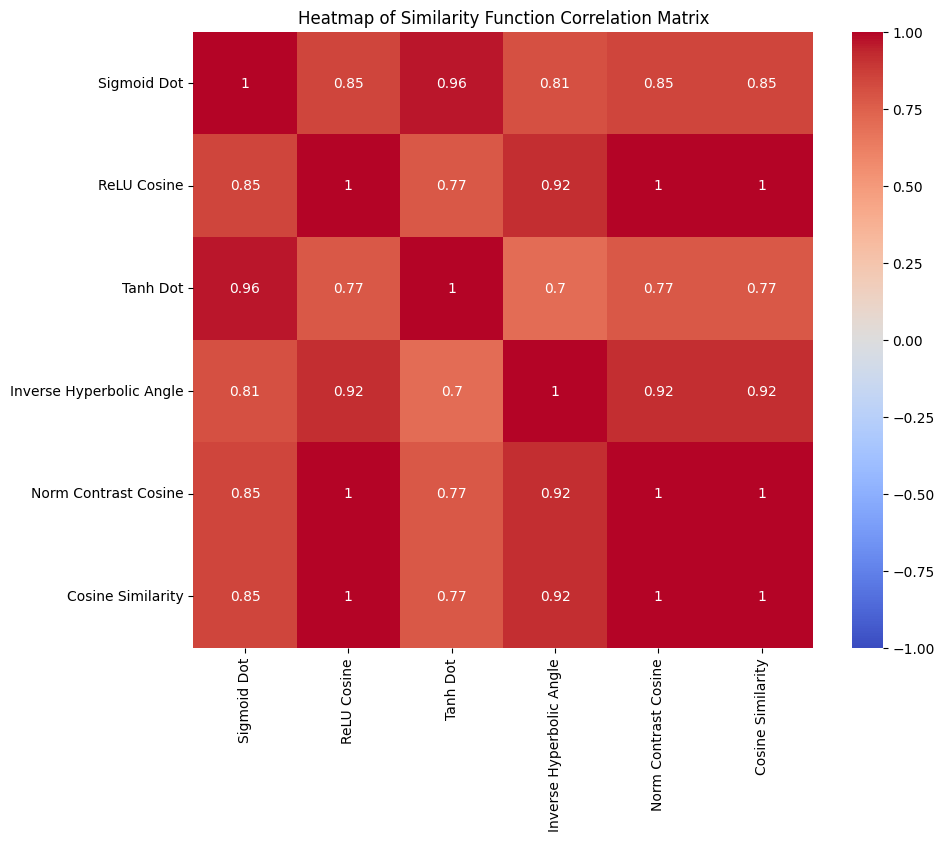

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
np.random.seed(0)
scaled_features = np.random.rand(6, 10)
def sigmoid_dot_similarity(x, y):
    return 1 / (1 + np.exp(-np.dot(x, y)))

def relu_weighted_cosine_similarity(x, y):
    cosine_sim = np.dot(x, y) / (np.linalg.norm(x) * np.linalg.norm(y))
    return max(0, cosine_sim)

def tanh_dot_similarity(x, y):
    return np.tanh(np.dot(x, y))

def inverse_hyperbolic_angle_similarity(x, y):
    dot = np.dot(x, y)
    norm_x = np.linalg.norm(x)
    norm_y = np.linalg.norm(y)
    cos_angle = dot / (norm_x * norm_y)
    cos_angle = np.clip(cos_angle, -1, 1)
    angle = np.arccos(cos_angle)
    return 1 / (angle + 1e-10)

def norm_contrast_cosine_similarity(x, y):
    cosine_sim = np.dot(x, y) / (np.linalg.norm(x) * np.linalg.norm(y))
    return (cosine_sim + 1) / 2

similarities = {
    "Sigmoid Dot": sigmoid_dot_similarity,
    "ReLU Cosine": relu_weighted_cosine_similarity,
    "Tanh Dot": tanh_dot_similarity,
    "Inverse Hyperbolic Angle": inverse_hyperbolic_angle_similarity,
    "Norm Contrast Cosine": norm_contrast_cosine_similarity,
    "Cosine Similarity": lambda x, y: np.dot(x, y) / (np.linalg.norm(x) * np.linalg.norm(y)),
}

flattened = {}
for name, func in similarities.items():
    sim_matrix = np.zeros((6, 6))
    for i in range(6):
        for j in range(6):
            sim_matrix[i, j] = func(scaled_features[i], scaled_features[j])
    flat = sim_matrix[np.triu_indices(6, k=1)]
    flattened[name] = flat
df = pd.DataFrame(flattened)

corr_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Heatmap of Similarity Function Correlation Matrix")
plt.show()


In [ ]:
merged_df

,imdb_title_id,title,year,weighted_average_vote,total_votes,mean_vote,median_vote,votes_10,votes_9,votes_8,...,females_30age_avg_vote,females_30age_votes,females_45age_avg_vote,females_45age_votes,top1000_voters_rating,top1000_voters_votes,us_voters_rating,us_voters_votes,non_us_voters_rating,non_us_voters_votes
0,tt0000009,Miss Jerry,1894,5.9,154,5.9,6.0,12,4,10,...,5.7,13.0,4.5,4.0,5.7,34.0,6.4,51.0,6.0,70.0
4,tt0002130,L'Inferno,1911,7.0,2237,6.9,7.0,210,225,436,...,7.3,82.0,7.4,77.0,6.9,139.0,7.0,488.0,7.0,1166.0
24,tt0003740,Cabiria,1914,7.1,3073,6.5,7.0,285,301,591,...,6.9,134.0,6.8,194.0,6.9,177.0,7.0,1035.0,7.0,1332.0
47,tt0004972,Nascita di una nazione,1915,6.3,22213,6.4,7.0,3661,1741,3314,...,5.8,1106.0,5.9,725.0,6.5,355.0,6.3,7452.0,6.4,8306.0
55,tt0005680,Maciste,1915,5.9,130,5.9,6.0,4,3,8,...,6.5,4.0,6.2,5.0,5.7,50.0,5.9,26.0,5.8,87.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85818,tt9870726,Gholamreza Takhti,2019,6.7,630,6.9,7.0,69,54,132,...,6.8,16.0,5.7,3.0,6.7,6.0,6.8,27.0,6.6,289.0
85819,tt9872556,Momenti di trascurabile felicità,2019,5.5,784,5.7,6.0,28,28,56,...,4.6,50.0,4.0,20.0,5.3,37.0,2.3,83.0,5.8,379.0
85832,tt9892094,Mogul Mowgli,2020,6.9,143,7.1,7.0,11,4,21,...,6.9,9.0,7.0,1.0,6.7,15.0,6.9,28.0,6.7,78.0
85835,tt9894394,Upin & Ipin: Keris Siamang Tunggal,2019,7.9,440,8.5,10.0,275,48,26,...,9.6,10.0,4.8,5.0,1.0,1.0,6.0,20.0,5.9,65.0


In [ ]:
merged_df.to_csv('merged_data.csv', index=False)


In [ ]:
import numpy as np
import pandas as pd
import difflib
import re
from scipy.stats import spearmanr
from sklearn.preprocessing import StandardScaler

def clean_title(title):
    return re.sub(r'[^\w\s]', '', str(title)).strip().lower()

def sigmoid_dot_similarity(x, y):
    return 1 / (1 + np.exp(-np.dot(x, y)))

def relu_weighted_cosine_similarity(x, y):
    cosine_sim = np.dot(x, y) / (np.linalg.norm(x) * np.linalg.norm(y))
    return max(0, cosine_sim)

def tanh_dot_similarity(x, y):
    return np.tanh(np.dot(x, y))

def inverse_hyperbolic_angle_similarity(x, y):
    dot = np.dot(x, y)
    norm_x = np.linalg.norm(x)
    norm_y = np.linalg.norm(y)
    cos_angle = dot / (norm_x * norm_y)
    cos_angle = np.clip(cos_angle, -1, 1)
    angle = np.arccos(cos_angle)
    return 1 / (angle + 1e-10)

def norm_contrast_cosine_similarity(x, y):
    cosine_sim = np.dot(x, y) / (np.linalg.norm(x) * np.linalg.norm(y))
    return (cosine_sim + 1) / 2

def hss_similarity(cosine_ids, metric_ids):
    common = list(set(cosine_ids) & set(metric_ids))
    if common:
        cosine_ranks = {movie: idx for idx, movie in enumerate(cosine_ids)}
        metric_ranks = {movie: idx for idx, movie in enumerate(metric_ids)}
        rank_similarity = sum(1 / (abs(cosine_ranks[m] - metric_ranks[m]) + 1) for m in common)
        return rank_similarity / len(common)
    return 0
def get_all_similarity_recommendations(movie_title, similarity_functions, features, indices, dataset, top_n=10):
    cleaned_input = clean_title(movie_title)
    matches = difflib.get_close_matches(cleaned_input, indices.index, n=3, cutoff=0.4)
    if not matches:
        sample_titles = "\n".join([f"- {t}" for t in dataset['title'].sample(min(5, len(dataset)))])
        return f" No match for '{movie_title}'. Try:\n{sample_titles}", None

    best_match = matches[0]
    movie_index = indices[best_match]
    actual_title = dataset.loc[movie_index, 'title']

    recommendations = {}
    output = f"\n🎬 Recommendations for: **{actual_title}**\n"

    for name, sim_func in similarity_functions.items():
        similarities = []
        for i in range(len(features)):
            if i != movie_index:
                sim_score = sim_func(features[movie_index], features[i])
                similarities.append((i, sim_score))
        top_movies = sorted(similarities, key=lambda x: x[1], reverse=True)[:top_n]
        rec_list = [{
            'name': dataset.iloc[i]['title'],
            'year': int(dataset.iloc[i]['year']),
            'score': score
        } for (i, score) in top_movies]
        recommendations[name] = rec_list

        output += f"\n🔍 Similarity: **{name}**\n"
        for rank, movie in enumerate(rec_list, 1):
            output += f"{rank}. {movie['name']} ({movie['year']}) - Score: {movie['score']:.4f}\n"

    return output, recommendations
def compare_to_cosine(recommendations, top_n=10):
    if 'Cosine Similarity' not in recommendations:
        return "Cosine Similarity not found in recommendations"

    cosine_recs = recommendations['Cosine Similarity']
    cosine_ids = [(m['name'], m['year']) for m in cosine_recs[:top_n]]

    results = {}
    for metric, recs in recommendations.items():
        if metric == 'Cosine Similarity':
            continue
        metric_ids = [(m['name'], m['year']) for m in recs[:top_n]]
        overlap = len(set(cosine_ids) & set(metric_ids))
        overlap_ratio = overlap / top_n
        common = list(set(cosine_ids) & set(metric_ids))
        if len(common) > 1:
            cosine_ranks = {movie: idx for idx, movie in enumerate(cosine_ids)}
            metric_ranks = {movie: idx for idx, movie in enumerate(metric_ids)}
            cos_r = [cosine_ranks[m] for m in common]
            met_r = [metric_ranks[m] for m in common]
            corr, _ = spearmanr(cos_r, met_r)
        else:
            corr = None

        results[metric] = {
            'overlap': overlap,
            'ratio': overlap_ratio,
            'correlation': corr,
        }

    return results

if __name__ == "__main__":

    merged_df['clean_title'] = merged_df['title'].apply(clean_title)
    indices = pd.Series(merged_df.index, index=merged_df['clean_title'])
    feature_cols = [
        'weighted_average_vote', 'total_votes', 'mean_vote', 'median_vote',
        'votes_10', 'votes_9', 'votes_8', 'votes_7', 'votes_6', 'votes_5', 'votes_4', 'votes_3', 'votes_2', 'votes_1',
        'allgenders_0age_avg_vote', 'allgenders_0age_votes', 'allgenders_18age_avg_vote', 'allgenders_18age_votes',
        'allgenders_30age_avg_vote', 'allgenders_30age_votes', 'allgenders_45age_avg_vote', 'allgenders_45age_votes',
        'males_allages_avg_vote', 'males_allages_votes', 'males_0age_avg_vote', 'males_0age_votes', 'males_18age_avg_vote',
        'males_18age_votes', 'males_30age_avg_vote', 'males_30age_votes', 'males_45age_avg_vote', 'males_45age_votes',
        'females_allages_avg_vote', 'females_allages_votes', 'females_0age_avg_vote', 'females_0age_votes',
        'females_18age_avg_vote', 'females_18age_votes', 'females_30age_avg_vote', 'females_30age_votes',
        'females_45age_avg_vote', 'females_45age_votes', 'top1000_voters_rating', 'top1000_voters_votes',
        'us_voters_rating', 'us_voters_votes', 'non_us_voters_rating', 'non_us_voters_votes'
    ]

    features = merged_df[feature_cols].fillna(0).values
    scaler = StandardScaler()
    scaled_features = scaler.fit_transform(features)
    similarities = {
      "Cosine Similarity": lambda x, y: np.dot(x, y) / (np.linalg.norm(x) * np.linalg.norm(y)),
     "Sigmoid Dot": sigmoid_dot_similarity,
     "ReLU Weighted Cosine": relu_weighted_cosine_similarity,
    "Tanh Dot": tanh_dot_similarity,
      "Inverse Hyperbolic Angle": inverse_hyperbolic_angle_similarity,
    "Norm Contrast Cosine": norm_contrast_cosine_similarity,
    "HSS Similarity": hss_similarity
}

    movie_input = input("\n🎬Enter a movie title: ")
    top_n = int(input("Enter the number of recommendations (between 10 and 100): "))
    top_n = max(10, min(top_n, 100))
    output_str, recommendations = get_all_similarity_recommendations(
        movie_input, similarities, scaled_features, indices, merged_df, top_n=top_n
    )
    print(output_str)
    if recommendations:
        comparison = compare_to_cosine(recommendations, top_n=top_n)
        print("\n=== Comparison with Cosine Similarity ===")
        print(f"{'Metric':<30} | {'Overlap':<10} | {'Correlation':<10} ")
        print("-" * 70)
        for metric, data in comparison.items():
            corr = f"{data['correlation']:.2f}" if data['correlation'] is not None else "N/A"
            print(f"{metric:<30} | {data['overlap']}/{top_n}    | {corr:<10}")



🎬Enter a movie title: Cabiria
Enter the number of recommendations (between 10 and 100): 100

🎬 Recommendations for: **Cabiria**

🔍 Similarity: **Cosine Similarity**
1. Un condannato a morte è fuggito (1956) - Score: 0.9941
2. Tarda primavera (1949) - Score: 0.9939
3. Il porto delle nebbie (1938) - Score: 0.9937
4. I Nibelunghi: Sigfrido (1924) - Score: 0.9937
5. La paura mangia l'anima (1974) - Score: 0.9926
6. I figli della violenza (1950) - Score: 0.9925
7. Onibaba (1964) - Score: 0.9915
8. Secondo amore (1955) - Score: 0.9914
9. Barbarossa (1965) - Score: 0.9912
10. L'angelo ubriaco (1948) - Score: 0.9911
11. Pelle alla conquista del mondo (1987) - Score: 0.9910
12. I ruggenti anni venti (1939) - Score: 0.9909
13. Intolerance (1916) - Score: 0.9909
14. Tirate sul pianista (1960) - Score: 0.9905
15. Roma città aperta (1945) - Score: 0.9905
16. L'armata degli eroi (1969) - Score: 0.9905
17. La regola del gioco (1939) - Score: 0.9904
18. Divorzio all'italiana (1961) - Score: 0.9896
19